<h1><center><center><h1><h1><center><span style="color:#2189b5">Telco customer churn</span><center><h1>

# My Libraries :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from colorama import Fore

# My Fugure Size : 

In [2]:
from matplotlib import rcParams            
rcParams['figure.figsize'] = (20,10) 

# Remove Warnings : 

In [3]:
import warnings
warnings.simplefilter("ignore")

# My Dataset :

In [4]:
telco = pd.read_csv('Datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv')
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<br><br><br><br><br><br>
# Exploring Data : 
<br><br><br>

### Shape of the data : 

In [5]:
print(Fore.LIGHTBLUE_EX + 'Number of row is :',telco.shape[0])
print(Fore.LIGHTBLUE_EX + 'Number of columns is :',telco.shape[1])

Number of row is : 7043
Number of columns is : 21


### Showing Data info : 

In [6]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Number of complete duplicates : 

In [7]:
print(Fore.LIGHTBLUE_EX + 'Number of complete duplicates is :',telco.duplicated().sum())

Number of complete duplicates is : 0


### Checking if there is customers with same Id : 

In [8]:
print(Fore.LIGHTBLUE_EX + 'Number of Id duplicates is :',telco['customerID'].duplicated().sum())

Number of Id duplicates is : 0


### Checking Number of NaN values in the data : 

In [9]:
telco.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Describing Data :  

    - Describing Continuous Data

In [10]:
telco.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


    - Describing Categorical Data : 

In [11]:
telco.drop(['SeniorCitizen','tenure','MonthlyCharges'],axis=1).describe()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


<br><br><br><br><br><br>
## Ok Now I got important informations about the data :  
> - No `Complete duplicates` <br><br>
> - No `NaN values` <br><br>
> - No `Id duplicates` <br><br>
> - 3 columns have `continous` data, and rest of them are `discrete` <br>

# Cleaning Data :

<br><br><br>
### Ok I used `customerID` column to check if ther is duplicates...
### But now it will be useless

In [12]:
telco.drop('customerID',axis=1,inplace=True)
telco.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Making a countplot for `Churn` column :

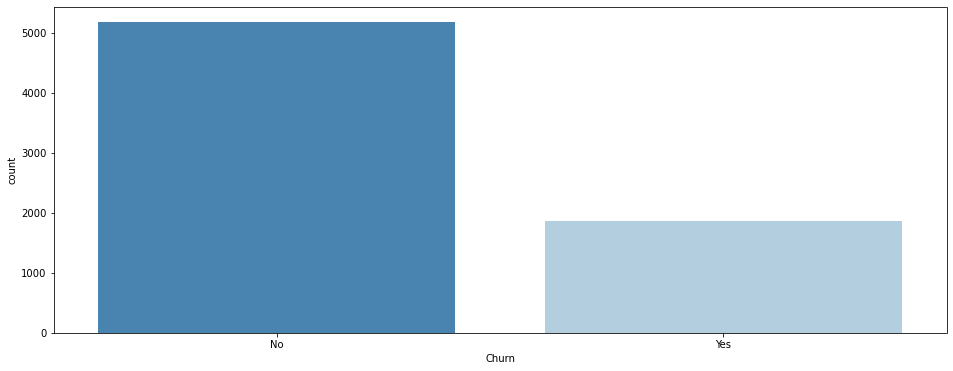

In [13]:
fig = plt.figure(figsize=(16,6))

sns.countplot(x='Churn',data=telco,palette='Blues_r')
plt.show()

### Making plot for all categorical data :

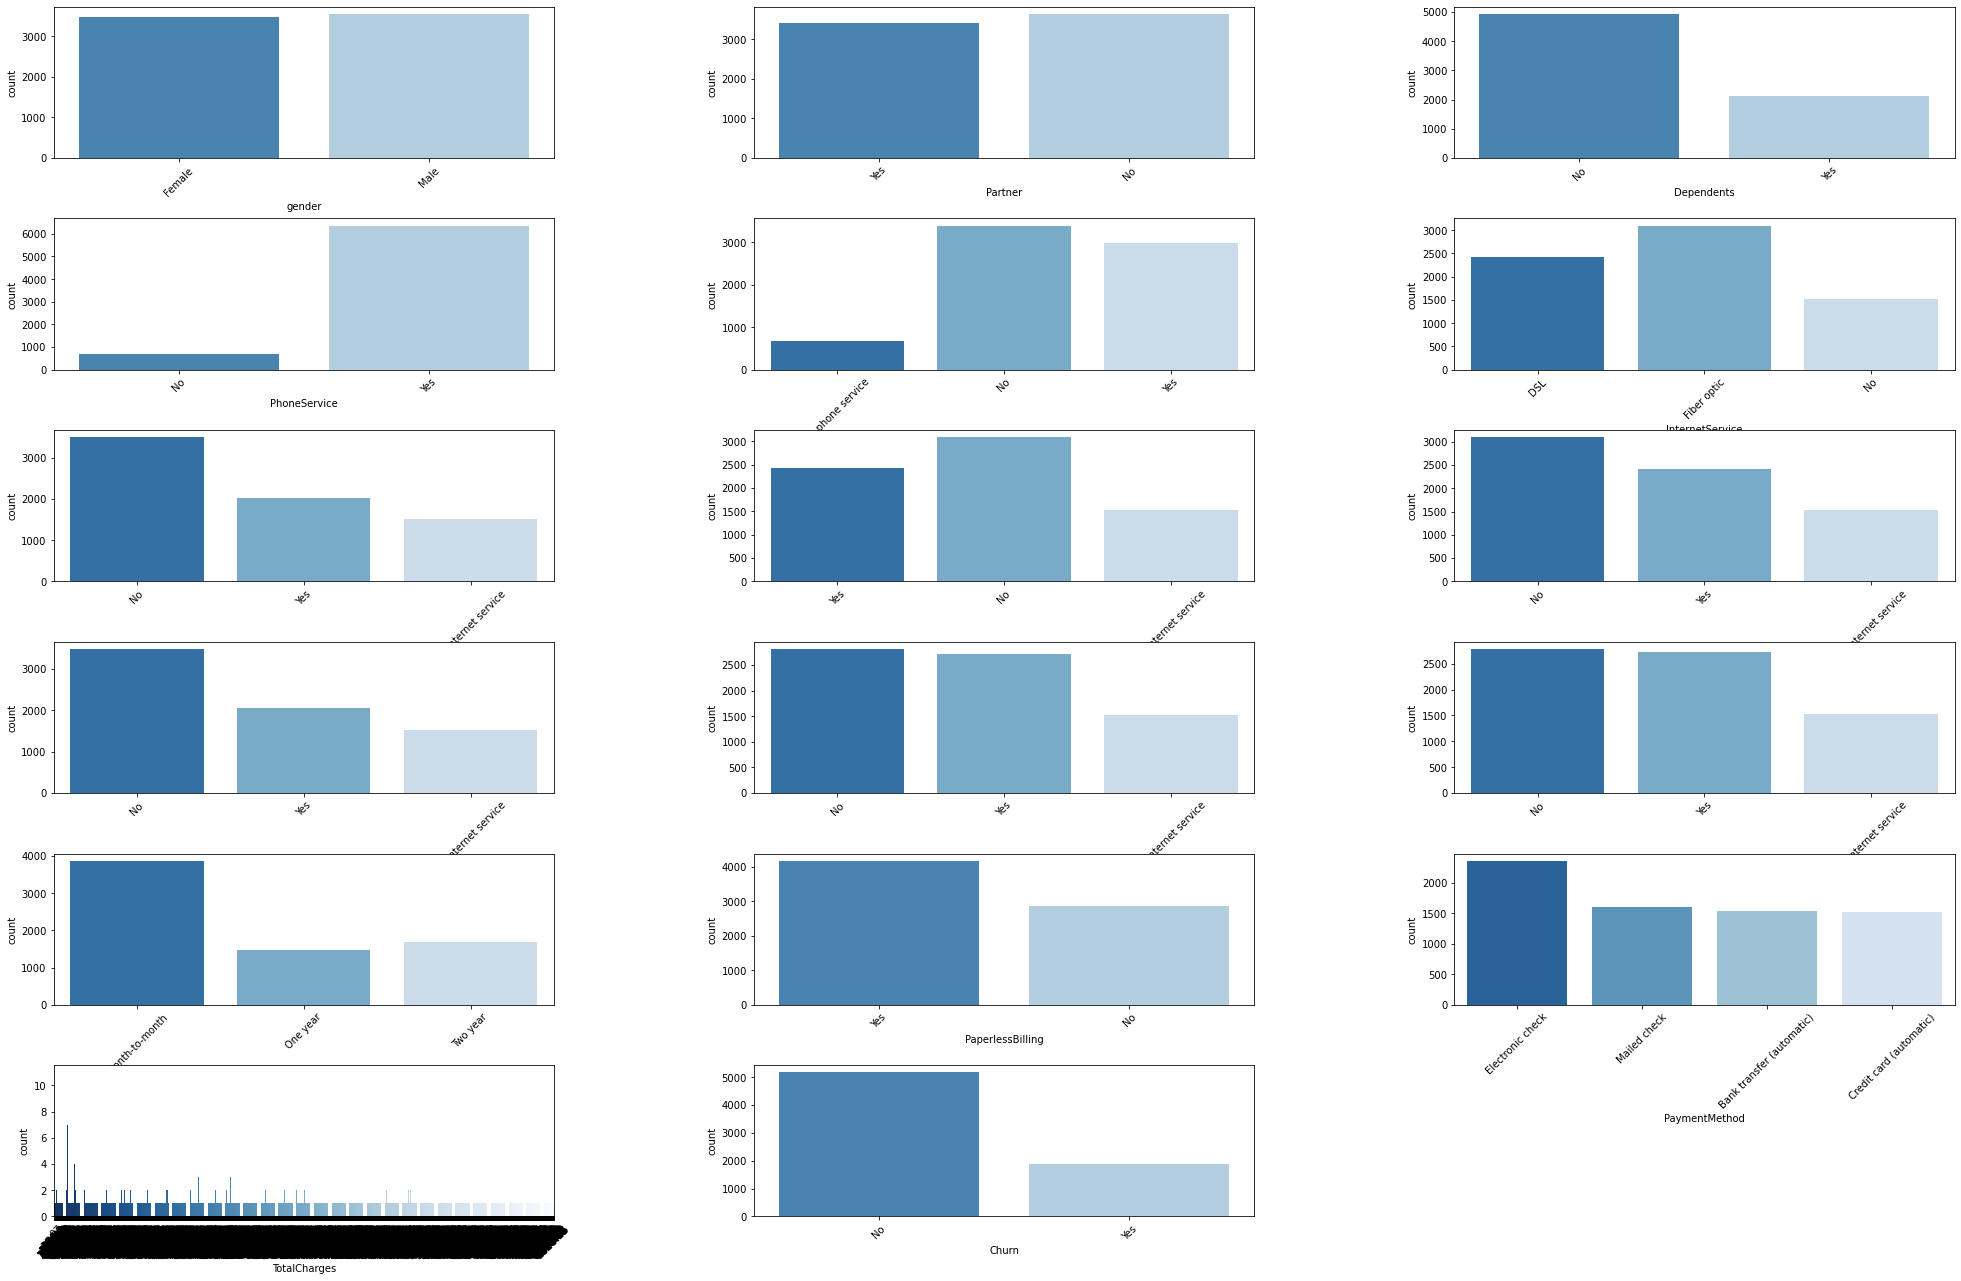

In [14]:
fig = plt.figure(figsize=(24,24))

counter = 0

for i in telco.columns:
    if telco[i].dtype == 'object':
        sub = fig.add_subplot(6,3,counter+1)
        g = sns.countplot(x=i,data=telco,palette='Blues_r')
        plt.xticks(rotation=45)
        plt.subplots_adjust(left=0.1,
                bottom=0.2,
                right=1.2,
                top=0.9,
                wspace=0.4,
                hspace=0.4)
        counter = counter + 1

### Ok after ploting `TotalCharges` we can see that it is not `categorical` data....
### But why ??... We have to check that

In [15]:
print(Fore.LIGHTBLUE_EX+'Number of unique values is TotalCharges is :',len(telco['TotalCharges'].unique()))

Number of unique values is TotalCharges is : 6531


In [16]:
print(Fore.LIGHTBLUE_EX + '-> Type of "TotalCharges" column was : ',telco['TotalCharges'].dtype)


try :
    telco['TotalCharges'] = telco['TotalCharges'].astype('float')
except :
    print('\n\nThere is error will run here')

-> Type of "TotalCharges" column was :  object


There is error will run here


### Using try-catch approach... Now I know that these column contains data that is not numerical 

### Which is something we needs to deal with first.... 

In [17]:
telco['TotalCharges'] = pd.to_numeric(telco['TotalCharges'], errors='coerce')

print(Fore.LIGHTBLUE_EX + 'Now after making data numeric the Nan values will be :',telco['TotalCharges'].isna().sum())

Now after making data numeric the Nan values will be : 11


### Calculating % of Nan values after cleaning strings : 

In [18]:
persentage = telco['TotalCharges'].isna().sum()/telco['TotalCharges'].shape[0]
print(Fore.LIGHTBLUE_EX + '% of Nan values after cleaning is : {} %'.format(persentage))
print(Fore.LIGHTBLUE_EX + '\n\n-> Type of "TotalCharges" column now is : ',telco['TotalCharges'].dtype)

% of Nan values after cleaning is : 0.001561834445548772 %


-> Type of "TotalCharges" column now is :  float64


#### Such Low persentage can easily be ignored... But I will replace them by the mean of the data 
#### I don't need to look for correlations and impute depending on other columns as the 0.00156% is too low to even effect the data :)

In [19]:
telco['TotalCharges'].replace(np.nan,telco['TotalCharges'].mean(),inplace=True)
print(Fore.LIGHTBLUE_EX + 'Number of NaN values now is :',telco['TotalCharges'].isna().sum())

Number of NaN values now is : 0


### Now this this column is now fine 
### So that : Number of continous columns now is 4 ;)

In [20]:
telco.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


## Again visualizing categorical data : 

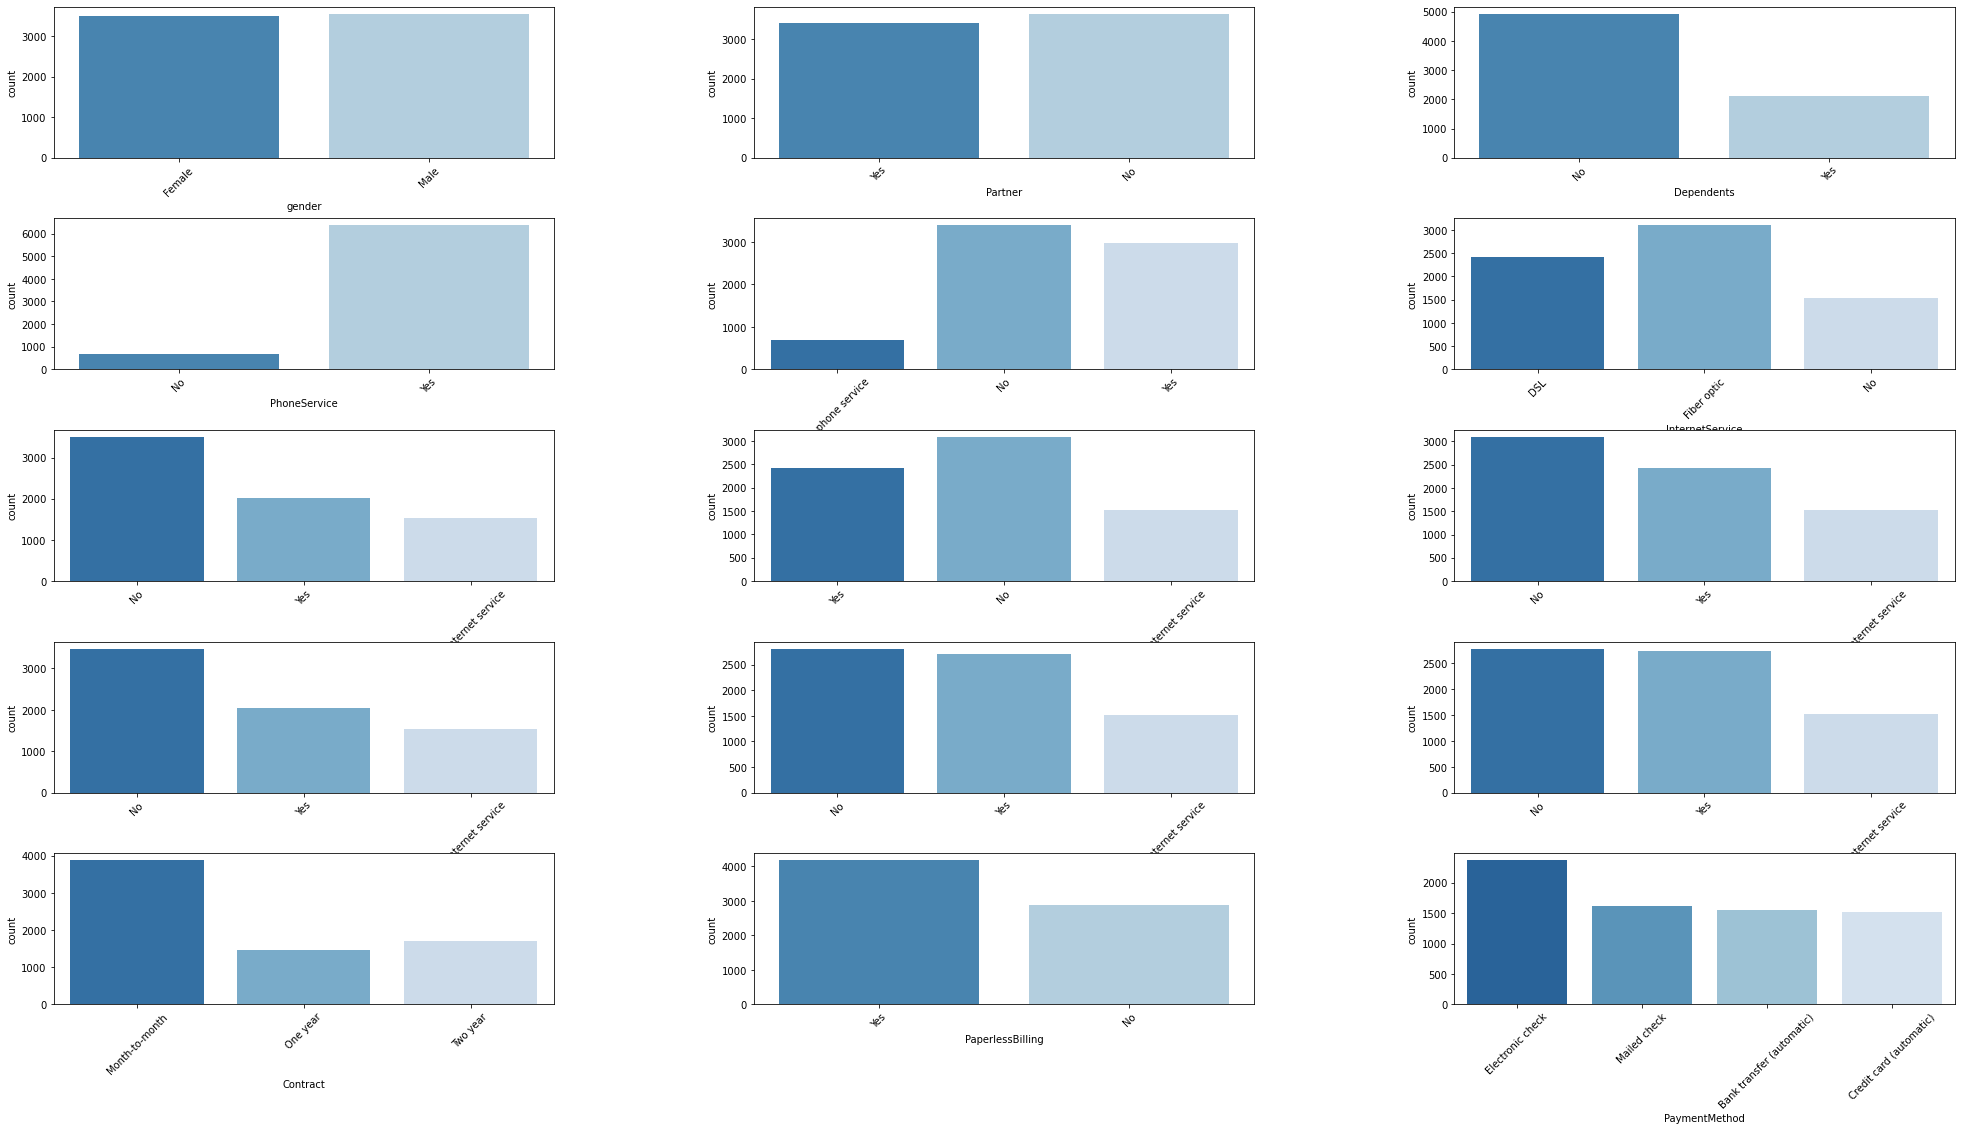

In [21]:
fig = plt.figure(figsize=(24,24))

counter = 0

for i in telco.columns:
    if telco[i].dtype == 'object' and i != 'Churn':
        sub = fig.add_subplot(6,3,counter+1)
        g = sns.countplot(x=i,data=telco,palette='Blues_r')
        plt.xticks(rotation=45)
        plt.subplots_adjust(left=0.1,
                bottom=0.2,
                right=1.2,
                top=0.9,
                wspace=0.4,
                hspace=0.4)
        counter = counter + 1

### Showing the previous data... but relative to `Churn` which is our target value for the Machine Learning Model

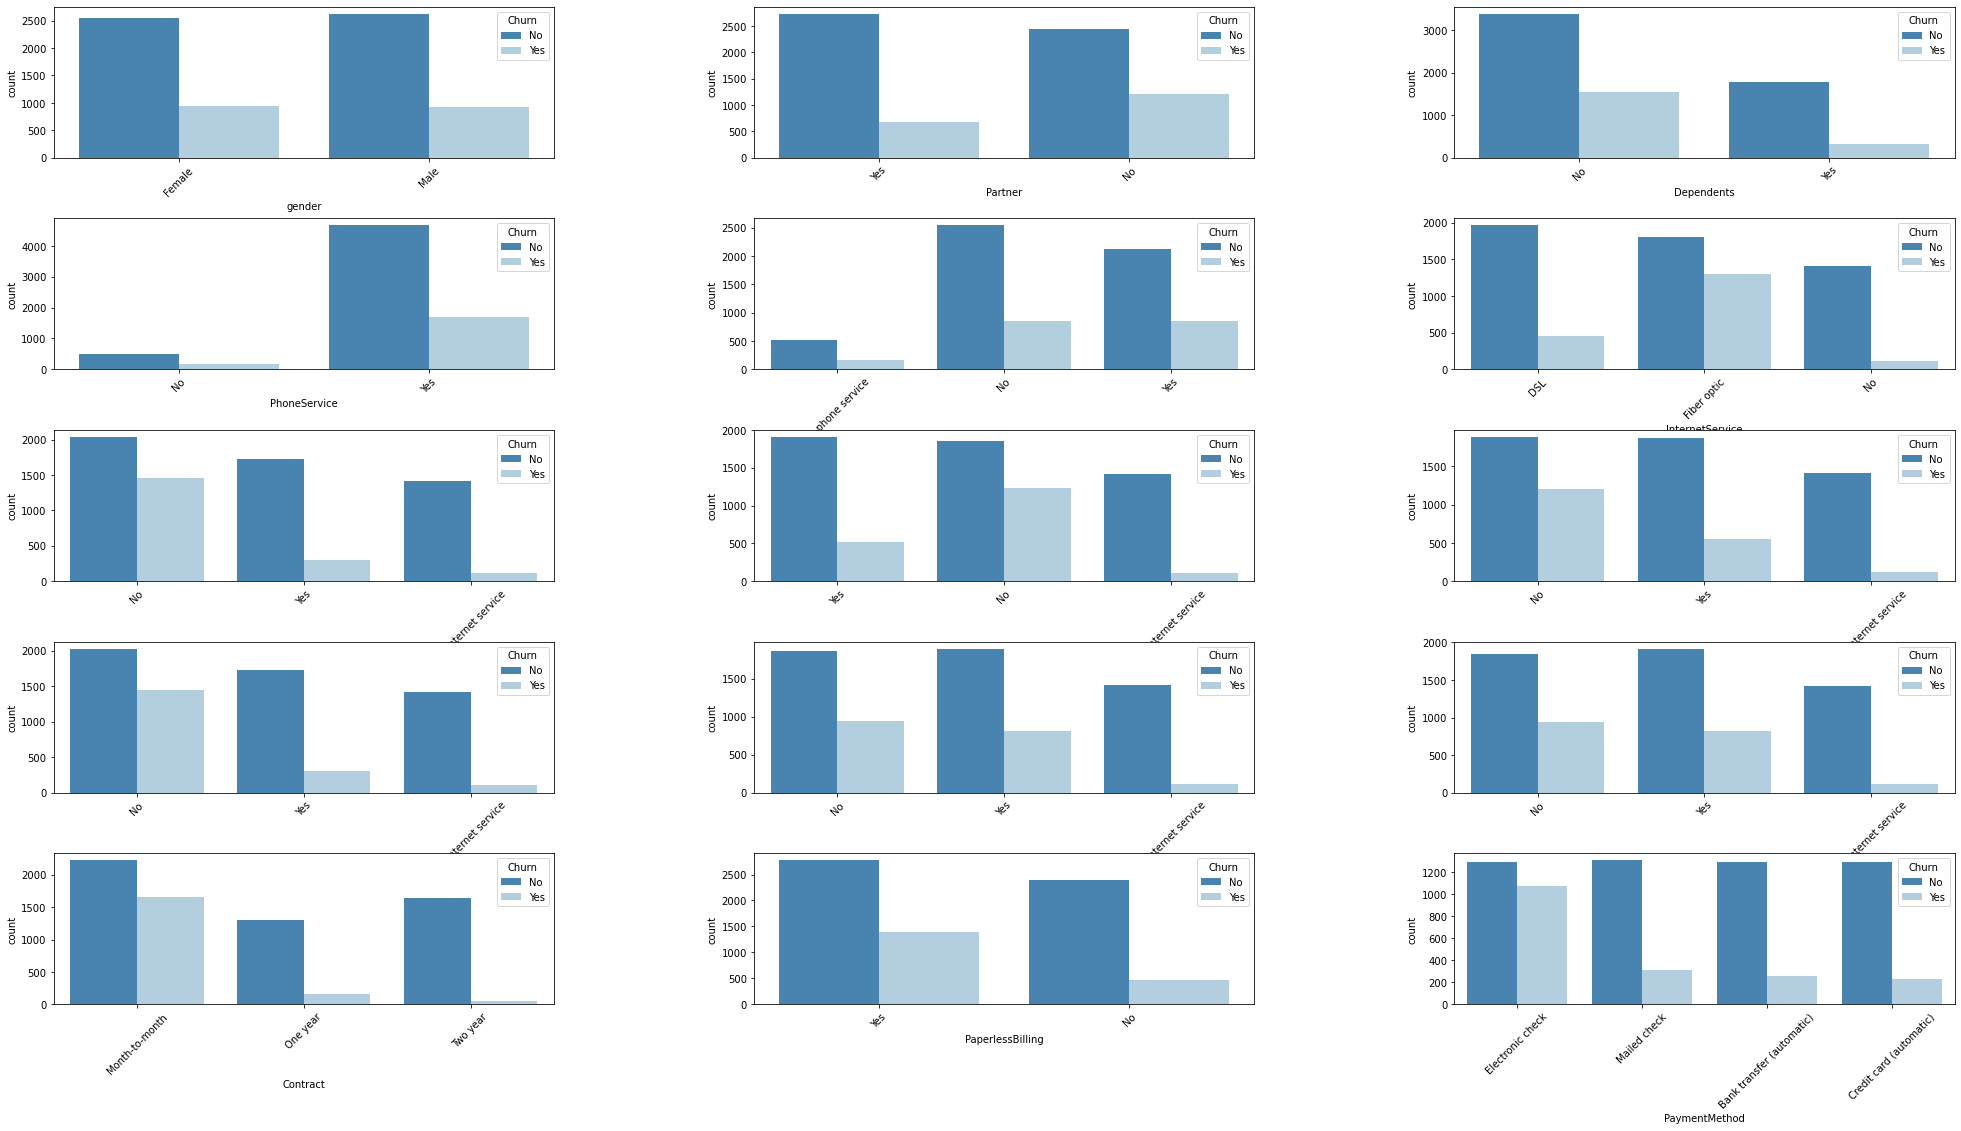

In [22]:
fig = plt.figure(figsize=(24,24))

counter = 0

for i in telco.columns:
    if telco[i].dtype == 'object' and i != 'Churn':
        sub = fig.add_subplot(6,3,counter+1)
        g = sns.countplot(x=i,data=telco,palette='Blues_r',hue='Churn')
        plt.xticks(rotation=45)
        plt.subplots_adjust(left=0.1,
                bottom=0.2,
                right=1.2,
                top=0.9,
                wspace=0.4,
                hspace=0.4)
        counter = counter + 1

## Everything Looks fine for now... Nothing needs to be changed :)

## Visualizing Continous data 

### Since I want to see the data distribution... I will use Boxplots, Kdeplots and violinplots 

<Figure size 1440x720 with 0 Axes>

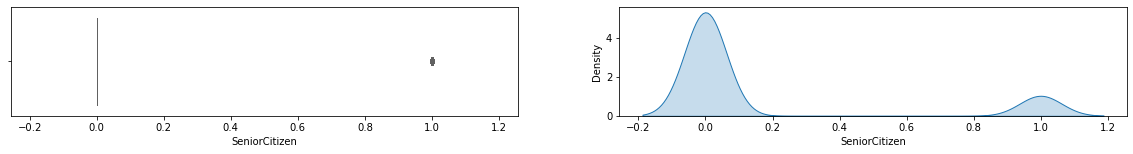

<Figure size 1440x144 with 0 Axes>

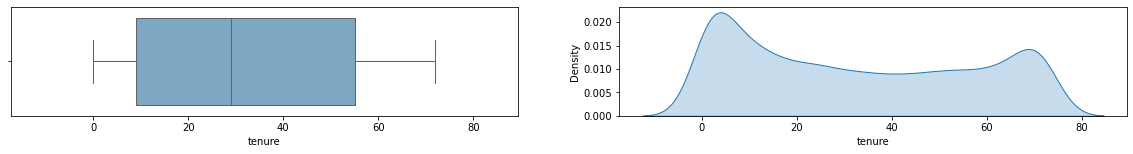

<Figure size 1440x144 with 0 Axes>

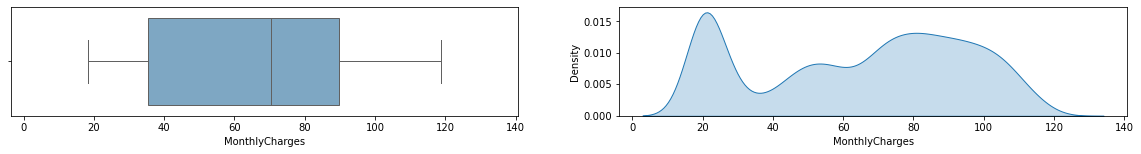

<Figure size 1440x144 with 0 Axes>

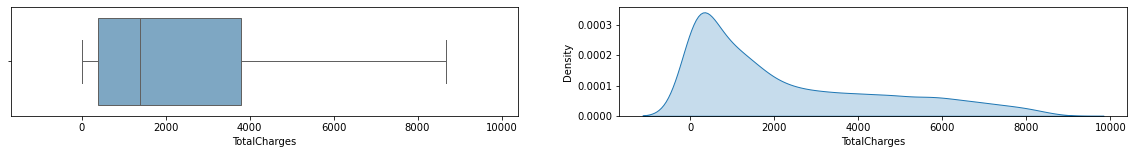

In [23]:
for i in telco.columns:
    if telco[i].dtype != 'object' :
        plt.figure()
    
        rcParams['figure.figsize'] = (20,2) 

        fig, (ax_box, ax_kde) = plt.subplots(ncols=2, sharex=True)
    
        plt.gca().set(xlabel= i,ylabel='Density')    
        sns.boxplot(telco[i], ax=ax_box , linewidth= 1.0, palette='PuBu')
        sns.kdeplot(telco[i], ax=ax_kde , fill=True, palette='PuBu')
    
        plt.show()

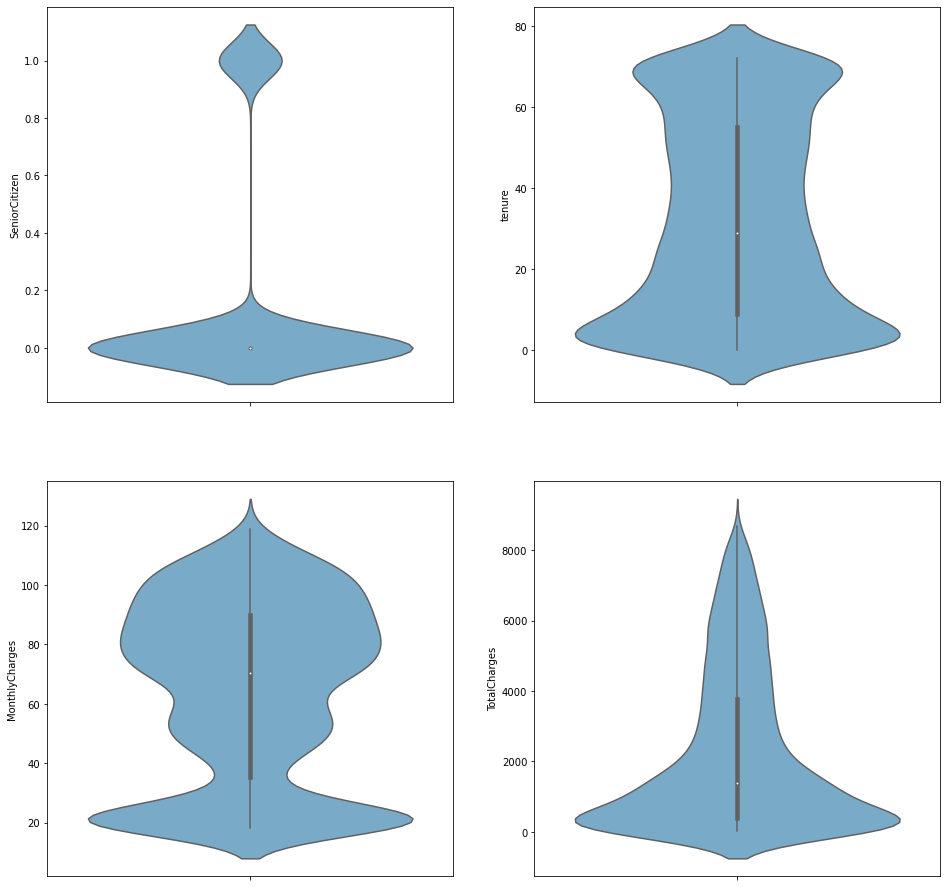

In [24]:
fig = plt.figure(figsize=(16,16))

counter = 0

for i in telco.columns:
    if telco[i].dtype != 'object' :
        sub = fig.add_subplot(2,2,counter+1)
        g = sns.violinplot(y=i,data=telco,palette='Blues_r')
        counter = counter + 1

## After Visualizing the continous data :
> - I can notice clear Skewness in `TotalCharges` column (before ML I have to adjust that) <br><br>
> - `SeniorCitizen` column don't look well at all :( ...I have to investigate it much more to know why 

### Looking at the dataset source again I discovered that seniorcitizen should be categorical (0:False , 1:True)
### So I will change its type to object

In [25]:
telco['SeniorCitizen'] = telco['SeniorCitizen'].astype('object')
print(Fore.LIGHTBLUE_EX + '-> Type of "SeniorCitizen" column now is : ',telco['SeniorCitizen'].dtype)

-> Type of "SeniorCitizen" column now is :  object


## For Now all the `data types` is clean and `Nan` Values problems are solved

### The Continous data now :

<Figure size 1440x144 with 0 Axes>

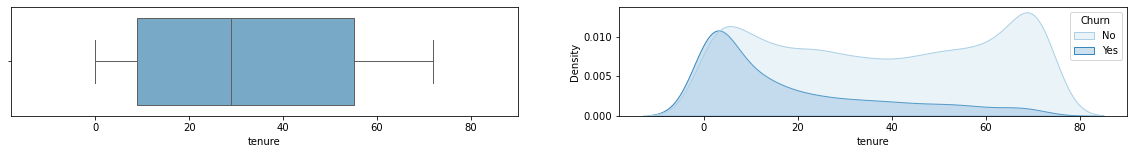

<Figure size 1440x144 with 0 Axes>

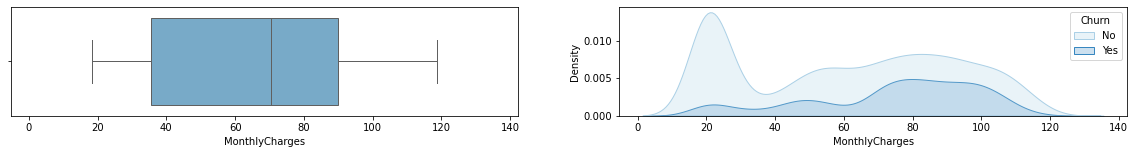

<Figure size 1440x144 with 0 Axes>

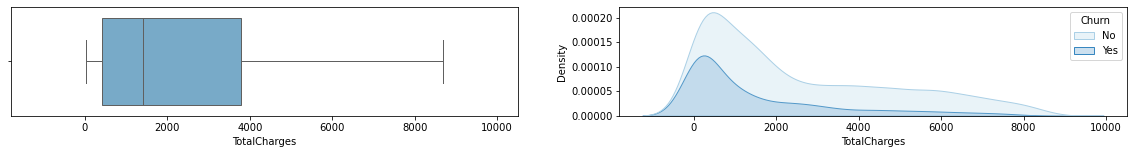

In [26]:
for i in telco.columns:
    if telco[i].dtype != 'object' :
        plt.figure()
    
        rcParams['figure.figsize'] = (20,2) 

        fig, (ax_box, ax_kde) = plt.subplots(ncols=2, sharex=True)
    
        plt.gca().set(xlabel= i,ylabel='Density')    
        sns.boxplot(telco[i], ax=ax_box , linewidth= 1.0, palette='Blues')
        sns.kdeplot(telco[i], ax=ax_kde , fill=True, palette='Blues',hue='Churn',data=telco)
    
        plt.show()

## For Now my Data looks good and clean :)

### Showing correlation between data using Heatmap : 

In [27]:
telco.corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.247900,0.824757
MonthlyCharges,0.247900,1.000000,0.650468
TotalCharges,0.824757,0.650468,1.000000


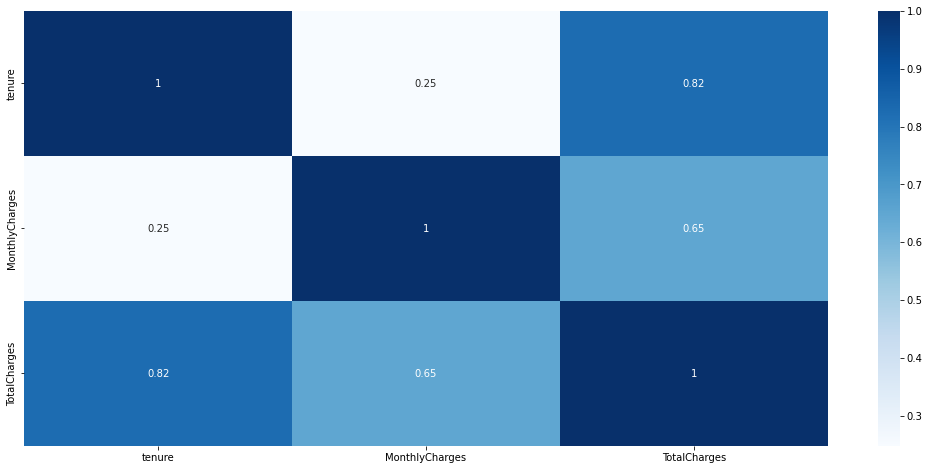

In [28]:
plt.figure(figsize=(18, 8))
heatmap = sns.heatmap(telco.corr(), annot=True,cmap='Blues')

## Now I can see that the data is relatively clean and I know the relations in it :)

<br><br><br><br><br><br>
# Data Processing :
<br><br><br>

In [29]:
telco.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### As mentioned before... there is 3 columns continous and the rest are categorical
### Before training this data to the model... we will nead to encode the categorical data using `OneHotEncoder`

In [30]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

### All Categorical columns : 

In [31]:
categorical_cols = []

for i in telco.columns:
    if telco[i].dtype == 'object':
        categorical_cols.append(i)

### I will remove `SeniorCitizenSeniorCitizen` as it is already encoded

In [32]:
categorical_cols.remove('SeniorCitizen')
categorical_cols.remove('Churn')

In [33]:
print(categorical_cols)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [34]:
df_to_encode = telco[categorical_cols]
df_to_encode.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [35]:
cols_with_2_values = []

for i in df_to_encode: 
    print(i)
    print(Fore.LIGHTBLUE_EX, df_to_encode[i].unique(),
          Fore.LIGHTBLACK_EX,'Number of unique values is :',Fore.LIGHTBLUE_EX,len(df_to_encode[i].unique()))
    print(Fore.LIGHTBLACK_EX + "-------------------------------------------------\n")
    if len(df_to_encode[i].unique()) == 2 : 
        cols_with_2_values.append(i)

gender
 ['Female' 'Male']  Number of unique values is :  2
-------------------------------------------------

Partner
 ['Yes' 'No']  Number of unique values is :  2
-------------------------------------------------

Dependents
 ['No' 'Yes']  Number of unique values is :  2
-------------------------------------------------

PhoneService
 ['No' 'Yes']  Number of unique values is :  2
-------------------------------------------------

MultipleLines
 ['No phone service' 'No' 'Yes']  Number of unique values is :  3
-------------------------------------------------

InternetService
 ['DSL' 'Fiber optic' 'No']  Number of unique values is :  3
-------------------------------------------------

OnlineSecurity
 ['No' 'Yes' 'No internet service']  Number of unique values is :  3
-------------------------------------------------

OnlineBackup
 ['Yes' 'No' 'No internet service']  Number of unique values is :  3
-------------------------------------------------

DeviceProtection
 ['No' 'Yes' 'No int

In [36]:
cols_with_2_values.remove('gender')

# gender is male and female not yes and no

### Ok data with yes and no answers will be encoded using OrdinalEncoder... While others will be by using OneHotEncoder

In [37]:
df_to_encode.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [38]:
df_normal_encoder = df_to_encode[cols_with_2_values]
df_one_hot_encoder = df_to_encode.drop(cols_with_2_values,axis=1)

In [39]:
normal_encoded = df_normal_encoder.replace({'Yes':1,'No':0})
normal_encoded.head()

,Partner,Dependents,PhoneService,PaperlessBilling
0,1,0,0,1
1,0,0,1,0
2,0,0,1,1
3,0,0,0,0
4,0,0,1,1


In [40]:
encoder = OneHotEncoder(categories='auto')

feature_arr = encoder.fit_transform(df_one_hot_encoder).toarray()
encoder_labels = encoder.get_feature_names(df_one_hot_encoder.columns)
features = pd.DataFrame(feature_arr,columns=encoder_labels)
features.head()

,gender_Female,gender_Male,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [41]:
len(categorical_cols)

15

In [42]:
len(df_one_hot_encoder.columns)

11

In [43]:
len(df_normal_encoder.columns)

4

In [44]:
telco.drop(categorical_cols,axis=1,inplace=True)
telco = pd.concat([telco,features,normal_encoded],axis=1)
telco.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Partner,Dependents,PhoneService,PaperlessBilling
0,0,1,29.85,29.85,No,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0,1
1,0,34,56.95,1889.50,No,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0
2,0,2,53.85,108.15,Yes,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,1
3,0,45,42.30,1840.75,No,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0,0,0,0
4,0,2,70.70,151.65,Yes,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0,0,1,1


### Now I want to work on continous data...

In [45]:
continous_cols = ['tenure','MonthlyCharges','TotalCharges']

telco[continous_cols].head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


In [46]:
telco[continous_cols].skew()

tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

### Skewness of TotalCharges is relatively high !!

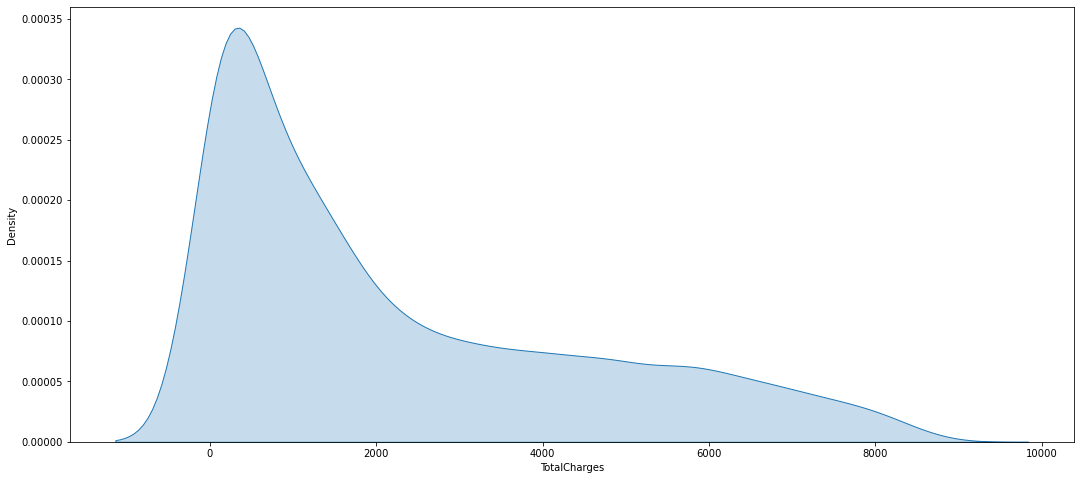

In [47]:
plt.figure(figsize=(18, 8))

sns.kdeplot(telco['TotalCharges'], fill=True, palette='PuBu')
plt.show()

### Now optimizing skewness :

In [48]:
telco['TotalCharges'] = np.log(telco['TotalCharges'])
telco['TotalCharges'].skew()

-0.7558896276917938

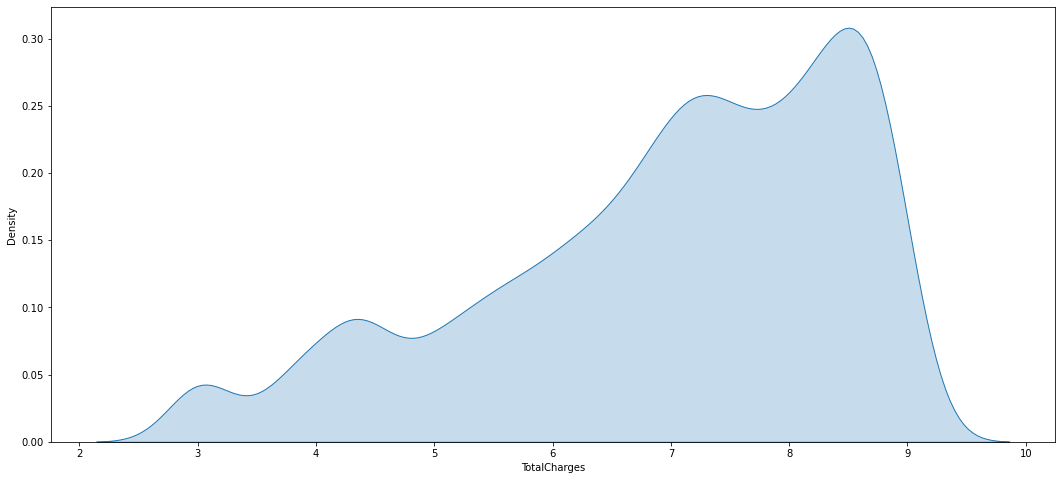

In [49]:
plt.figure(figsize=(18, 8))

sns.kdeplot(telco['TotalCharges'], fill=True, palette='PuBu')
plt.show()

## Much better skewness at least !!

## Now scaling the continous data :

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
sc = StandardScaler()

telco[continous_cols] = sc.fit_transform(telco[continous_cols])

In [52]:
telco['Churn'].replace({'Yes':1,'No':0},inplace=True)

# Now my data is ready to enter the machine learning model :)

In [53]:
telco.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Partner,Dependents,PhoneService,PaperlessBilling
0,0,-1.277445,-1.160323,-2.283661,0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0,1
1,0,0.066327,-0.259629,0.388723,0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0
2,0,-1.236724,-0.362660,-1.454262,1,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,1
3,0,0.514251,-0.746535,0.371882,0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0,0,0,0
4,0,-1.236724,0.197365,-1.236460,1,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0,0,1,1


<h1><center><center><h1><h1><center><span style="color:#2189b5">The Machine Learning Model</span><center><h1>

## The x and y data : 

In [54]:
x = telco.drop('Churn',axis=1)
y = telco[['Churn']]

# Now I will run lazypredict to help me choose the best models :

In [55]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

classify = LazyClassifier(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = classify.fit(X_train, X_test, y_train, y_test)

models.head(30)

 28%|██████████████████████▉                                                            | 8/29 [00:02<00:05,  3.97it/s]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


 90%|█████████████████████████████████████████████████████████████████████████▌        | 26/29 [00:10<00:01,  2.59it/s]

StackingClassifier model failed to execute
__init__() missing 1 required positional argument: 'estimators'


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:10<00:00,  2.66it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.71,0.76,0.76,0.73,0.02
BernoulliNB,0.72,0.76,0.76,0.74,0.03
GaussianNB,0.70,0.75,0.75,0.72,0.02
AdaBoostClassifier,0.82,0.74,0.74,0.81,0.28
LinearDiscriminantAnalysis,0.81,0.74,0.74,0.81,0.05
LogisticRegression,0.81,0.73,0.73,0.81,0.07
LinearSVC,0.81,0.73,0.73,0.81,0.45
CalibratedClassifierCV,0.81,0.73,0.73,0.81,1.81
SVC,0.81,0.72,0.72,0.80,1.23


## Here I can see models the best models of F1 score which are : 
> - LogisticRegression <br><br>	
> - LinearSVC <br><br>
> - AdaBoostClassifier <br><br>
> - SVC

## I will choose logistic regression to train my model :)

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [58]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

y_predicted = lr.predict(X_test)
model_score = lr.score(X_test,y_test)

## Evaluating the model :

In [59]:
print(Fore.LIGHTBLUE_EX,'Score of the model is : ',model_score)

 Score of the model is :  0.8119233498935415


In [60]:
cnf_matrix = confusion_matrix(y_test,y_predicted)
np.set_printoptions()
cnf_matrix

array([[934, 102],
       [163, 210]], dtype=int64)

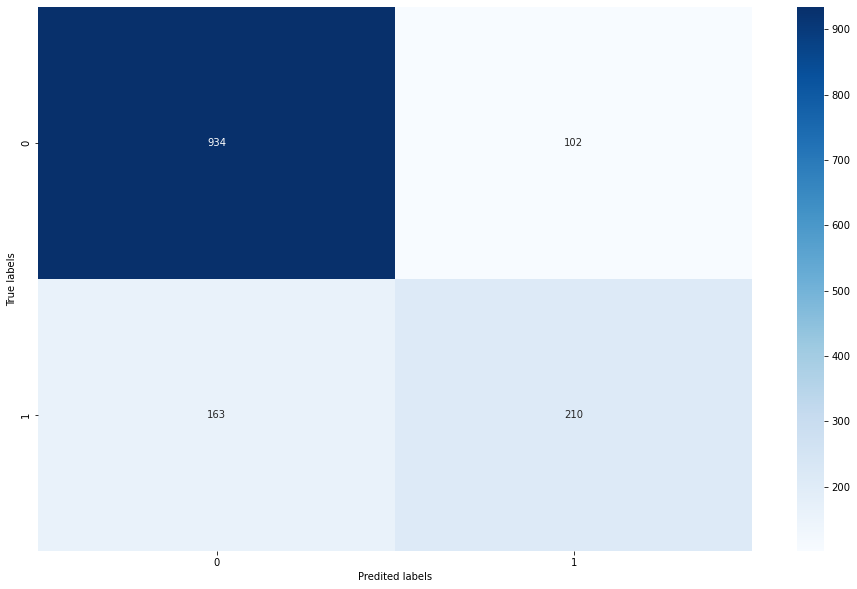

In [61]:
plt.figure(figsize=(16, 10))
sns.heatmap(cnf_matrix,cmap='Blues',annot=True,fmt='.3g')

plt.xlabel('Predited labels')
plt.ylabel('True labels')
plt.show()